# How Do the Athletes at University of Nebraska-Lincoln Perform Academically

## Context

The study was originally conducted by National Collegiate Athletic Association (NCAA) to track student-athletes' academic perfomance. The Academic Progress Rate (APR) was introduced to mearsure student-athletes' academic progress. The formula for the APR considers factors including student-athlete eligibility, retention and graduation. the NCAA recognizes the high APR scores indicate student-athletes academic sucess in the classroom, and the low APR scores raise the awareness of the poor performance at the institution. The institutions can be penalized by NCAA for consistently low APR scores.

In this article, we will use the dataset provided by NCAA, and take a look at how athletes at University of Nebraska-Lincoln perform academically comparing to the overall academic scores.

In [1]:
library(dplyr)
library(ggplot2)
library(reshape2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Overview

In [2]:
scores <- read.csv("NCAA_data.csv")
head(scores)

SCHOOL_ID,SCHOOL_NAME,SCHOOL_TYPE,ACADEMIC_YEAR,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,...,X2006_ELIGIBILITY,X2006_RETENTION,X2005_ATHLETES,X2005_SCORE,X2005_ELIGIBILITY,X2005_RETENTION,X2004_ATHLETES,X2004_SCORE,X2004_ELIGIBILITY,X2004_RETENTION
100654,Alabama A&M University,0,2014,1,Baseball,1,2,Southwestern Athletic Conference,80,...,0.8974,0.9487,21,917,0.8810,0.9524,20,975,0.9750,0.9750
100654,Alabama A&M University,0,2014,4,Football,1,2,Southwestern Athletic Conference,321,...,0.9111,0.9630,74,921,0.8759,0.9655,74,871,0.8601,0.8811
100654,Alabama A&M University,0,2014,2,Men's Basketball,1,2,Southwestern Athletic Conference,43,...,0.9615,0.8462,11,909,0.9091,0.9091,10,950,0.9500,0.9500
100654,Alabama A&M University,0,2014,6,Men's Golf,1,2,Southwestern Athletic Conference,22,...,0.8889,0.8889,7,929,0.8571,1.0000,-99,-99,-99.0000,-99.0000
100654,Alabama A&M University,0,2014,13,Men's Tennis,1,2,Southwestern Athletic Conference,12,...,0.8889,0.8889,4,1000,1.0000,1.0000,6,958,1.0000,0.9167
100654,Alabama A&M University,0,2014,14,"Men's Track, Indoor",1,2,Southwestern Athletic Conference,62,...,0.8889,0.9167,14,926,0.8519,1.0000,12,938,0.9167,0.9583


In [3]:
divisions <- scores %>%
    group_by(NCAA_DIVISION) %>%
    summarise(Athletes = sum(FOURYEAR_ATHLETES), Scores = mean(FOURYEAR_SCORE),
              Eligibility = mean(FOURYEAR_ELIGIBILITY), Retention = mean(FOURYEAR_RETENTION))

divisions

NCAA_DIVISION,Athletes,Scores,Eligibility,Retention
1,489332,977.8612,0.8368549,0.8307018
2,5102,964.0719,-0.4747518,-0.4795964
3,1648,991.0000,0.9931263,0.9864000


## Conference 

In [4]:
conferences <- scores %>%
    group_by(NCAA_CONFERENCE) %>%
    summarise(
    Athletes = sum(FOURYEAR_ATHLETES), Scores = mean(FOURYEAR_SCORE),
    Eligibility = mean(FOURYEAR_ELIGIBILITY), Retention = mean(FOURYEAR_RETENTION)
    ) %>% filter(Retention >= .94) %>%
    arrange(desc(Scores, Retention))

conferences

NCAA_CONFERENCE,Athletes,Scores,Eligibility,Retention
New England Women's and Men's Athletic Conference,62,1000.0000,1.0000000,1.0000000
Southern Collegiate Athletic Conference,158,998.5000,0.9970500,0.9935500
Northeast-10 Conference,239,996.6667,0.9977000,0.9954000
The Ivy League,24480,993.1555,0.9949958,0.9902975
Liberty League,1012,990.1818,0.9945455,0.9851000
Centennial Conference,274,990.0000,0.9884333,0.9899333
Big East Conference,10961,989.4326,0.9920719,0.9834725
Atlantic Coast Conference,26942,985.3567,0.9874107,0.9785951
Metro Atlantic Athletic Conference,13039,985.2417,0.9882104,0.9771123
Empire 8,142,985.0000,0.9850000,0.9743000


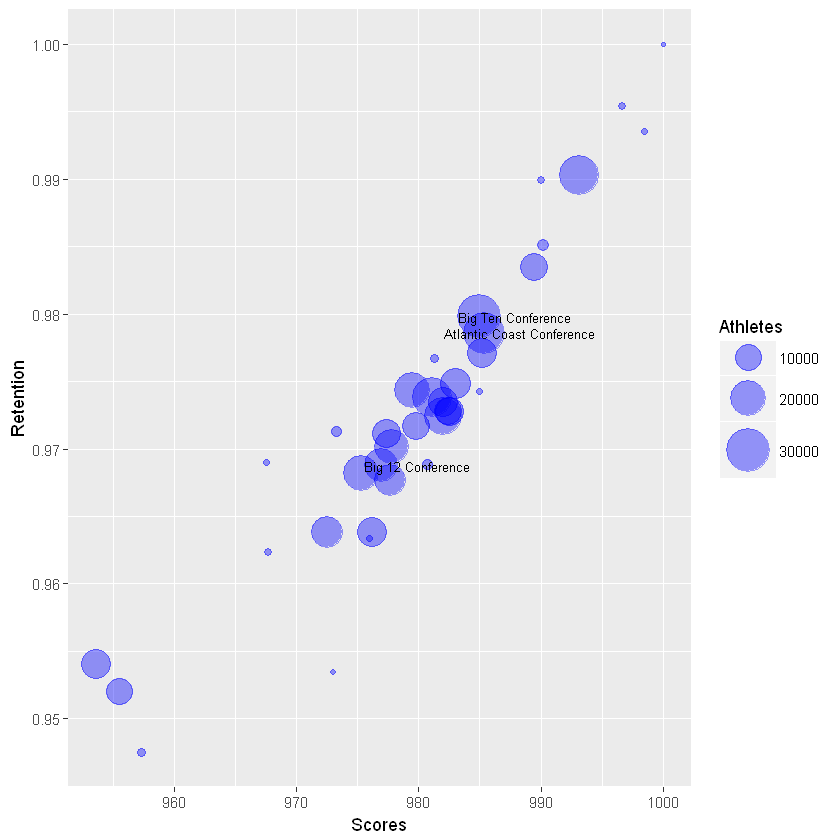

In [5]:
ggplot(conferences, aes(x = Scores, y = Retention, size= Athletes)) +
geom_point(alpha=.4, color="Blue") +
scale_size_continuous(range=c(1,12)) + 
geom_text(data=subset(conferences,NCAA_CONFERENCE == "Big Ten Conference" | NCAA_CONFERENCE == "Atlantic Coast Conference"| 
            NCAA_CONFERENCE == "Big 12 Conference"), aes(label=NCAA_CONFERENCE), size=2.8, nudge_x=3, check_overlap=TRUE)

University of Nebraska-Lincoln, who used to be a part of the Big 12 Conference, is now in the Big Ten Conference. Compare to other conferences, the Big Ten Conference has overall higher scores.

## College

In [6]:
schools <- scores %>%
    group_by(SCHOOL_NAME) %>%
    summarise(
    Athletes = sum(FOURYEAR_ATHLETES), Scores = mean(FOURYEAR_SCORE),
    Eligibility = mean(FOURYEAR_ELIGIBILITY), Retention = mean(FOURYEAR_RETENTION)
    ) %>% filter(Eligibility >= .88 & Retention >= .88) %>% 
    arrange(desc(Scores, Retention))

head(schools)
count(schools)

SCHOOL_NAME,Athletes,Scores,Eligibility,Retention
Massachusetts Institute of Technology,62,1000.0000,1.0000000,1.0000000
Merrimack College,92,1000.0000,1.0000000,1.0000000
Dartmouth College,3092,999.1071,0.9993679,0.9988179
Colorado College,158,998.5000,0.9970500,0.9935500
Rensselaer Polytechnic Institute,169,998.5000,1.0000000,0.9968000
Gonzaga University,1145,997.6471,0.9989824,0.9957118


n
375


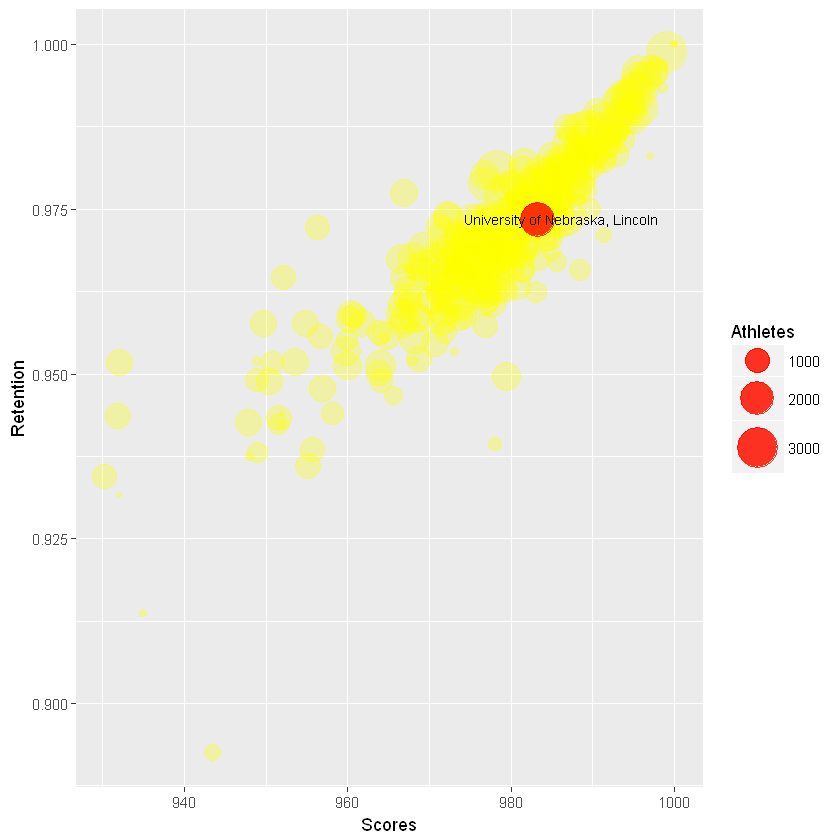

In [7]:
ggplot(schools, aes(x = Scores, y = Retention, size= Athletes)) +
geom_point(alpha=.3, color="Yellow") +
geom_point(data=subset(schools, SCHOOL_NAME == "University of Nebraska, Lincoln"), alpha=.8, color="Red") +
scale_size_continuous(range=c(1,12)) + 
geom_text(data=subset(schools, SCHOOL_NAME == "University of Nebraska, Lincoln"), 
                      aes(label=SCHOOL_NAME), size=3, nudge_x=3, check_overlap=TRUE)

University of Nebraska-Lincoln has a adequately decent academic performance overall.

In [8]:
sports <- scores %>%
    group_by(SPORT_NAME) %>%
    summarise(
    Athletes = mean(FOURYEAR_ATHLETES), Scores = mean(FOURYEAR_SCORE),
    Eligibility = mean(FOURYEAR_ELIGIBILITY), Retention = mean(FOURYEAR_RETENTION)
    ) %>% arrange(desc(Scores, Retention))

sports

SPORT_NAME,Athletes,Scores,Eligibility,Retention
Women's Golf,29.51711,991.6008,0.9889894,0.9808764
Women's Gymnastics,54.04918,990.9836,0.9908361,0.9877885
Women's Lacrosse,90.15534,989.9612,0.9916369,0.9830544
Women's Ice Hockey,79.91429,989.9143,0.9952657,0.9830229
Women's Tennis,30.58696,988.9627,0.9901512,0.9781022
Women's Water Polo,58.31250,988.4688,0.9887063,0.9818187
Women's Field Hockey,72.98718,988.2308,0.9922513,0.9818372
Women's Swimming,86.62944,988.1320,0.9885797,0.9845107
Women's Cross Country,44.71965,987.9913,0.9859500,0.9826353
Women's Skiing,42.66667,987.7500,0.9950083,0.9738083


By grouping sports, we realize that overall, female student-athletes perform better than male student-athletes.

## University of Nebraska-Lincoln 

In [9]:
unl <-scores %>% filter(SCHOOL_NAME == "University of Nebraska, Lincoln")
year <- unl[,c("SPORT_NAME", "X2014_SCORE", "X2013_SCORE", "X2012_SCORE", "X2011_SCORE",
               "X2010_SCORE", "X2009_SCORE", "X2008_SCORE", "X2007_SCORE", "X2006_SCORE",
               "X2005_SCORE","X2004_SCORE")]
names(year) <- c("Year", "2014", "2013", "2012", "2011", "2010", "2009", "2008", "2007", "2006", "2005", "2004")

temp <- setNames(data.frame(t(year[,-1])), year[,1])
unl_sports <- data.frame("Year"=rownames(temp),temp)
unl_sports

,Year,Baseball,Football,Men.s.Basketball,Men.s.Cross.Country,Men.s.Golf,Men.s.Gymnastics,Men.s.Tennis,Men.s.Track..Indoor,Men.s.Track..Outdoor,...,Women.s.Cross.Country,Women.s.Golf,Women.s.Gymnastics,Women.s.Soccer,Women.s.Softball,Women.s.Swimming,Women.s.Tennis,Women.s.Track..Indoor,Women.s.Track..Outdoor,Women.s.Volleyball
2014,2014,975,991,958,1000,978,983,1000,989,989,...,1000,964,983,989,982,1000,1000,1000,1000,1000
2013,2013,1000,966,1000,941,1000,1000,1000,986,986,...,1000,1000,1000,966,988,992,1000,993,993,971
2012,2012,953,991,940,1000,958,960,952,993,993,...,923,978,1000,980,1000,1000,971,987,987,956
2011,2011,951,991,896,1000,977,958,1000,988,988,...,1000,1000,981,979,986,993,1000,976,977,1000
2010,2010,1000,970,947,956,1000,906,972,977,977,...,1000,933,962,1000,988,993,1000,1000,1000,1000
2009,2009,972,934,957,1000,1000,979,1000,964,964,...,1000,975,969,1000,987,981,1000,1000,1000,1000
2008,2008,968,968,980,1000,933,978,950,975,975,...,1000,1000,1000,961,987,960,1000,974,974,1000
2007,2007,908,960,891,-99,969,977,975,959,959,...,1000,1000,1000,926,986,964,938,967,967,958
2006,2006,927,940,879,889,917,929,1000,905,905,...,923,1000,1000,988,1000,980,906,925,925,962
2005,2005,940,932,978,-99,861,1000,944,956,956,...,1000,1000,981,985,974,980,1000,954,954,963


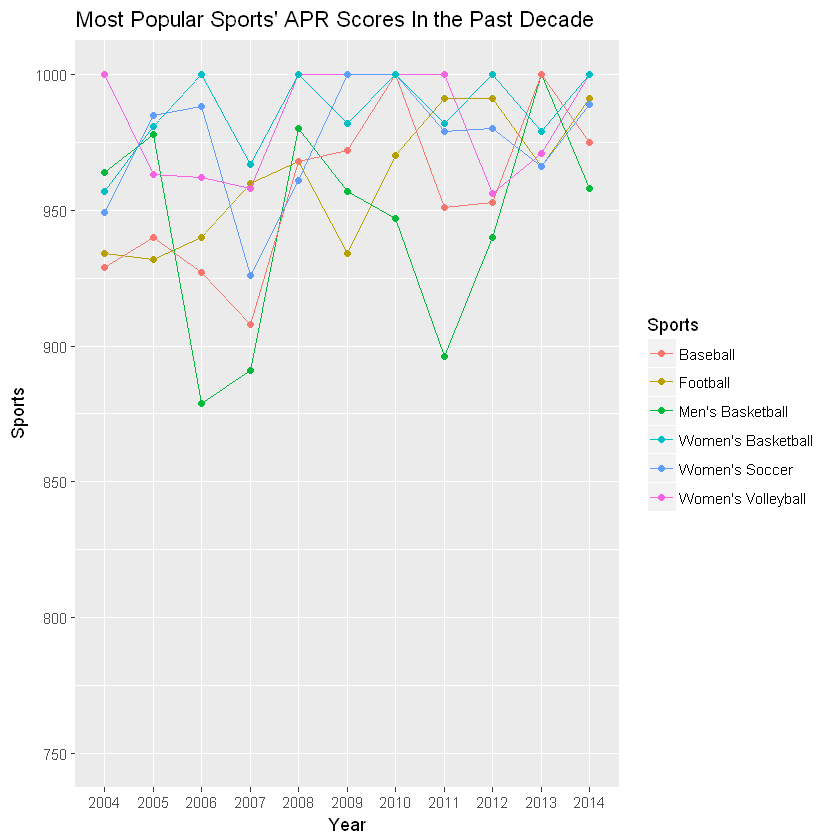

In [14]:
ggplot(unl_sports, aes(x=Year, colour=Sports, group = 1)) + 
    geom_point(aes(y=Football, colour="Football")) + 
        geom_line(aes(y=Football, colour="Football")) +
    geom_point(aes(y=Men.s.Basketball, colour="Men's Basketball")) + 
        geom_line(aes(y=Men.s.Basketball, colour="Men's Basketball")) +
    geom_point(aes(y=Women.s.Volleyball, colour="Women's Volleyball")) +
        geom_line(aes(y=Women.s.Volleyball, colour="Women's Volleyball")) +
    geom_point(aes(y=Baseball, colour="Baseball")) +
        geom_line(aes(y=Baseball, colour="Baseball")) +
    geom_point(aes(y=Women.s.Soccer, colour="Women's Soccer")) +
        geom_line(aes(y=Women.s.Soccer, colour="Women's Soccer")) +
    geom_point(aes(y=Women.s.Basketball, colour="Women's Basketball")) +
        geom_line(aes(y=Women.s.Basketball, colour="Women's Basketball")) +
    labs(x="Year", y="Sports") + scale_y_continuous(limits = c(750,1000)) + 
    ggtitle("Most Popular Sports' APR Scores In the Past Decade")

From the line chart above, we can see that among all the popular sports on campus, Men's basketball is the only sport that had APR scores below 900 in the past decade, and it also has higher flutuation compare to other popular sports. Overall, the academic perfomance for all the sports tends to become stablized between 950 and 1000 in recent years, which would be competitive among the entire NCAA.

## Conclusion 

As a public university with over 26,000 students on campus, including approximately 2,200 student-athletes, University of Nebraska-Lincoln has above average APR scores in the nation. Football, men's basketball, and women's volleyball are three of the most popular sports UNL campus. Their scores throughout the past decade have been flutuated in certain years.